# Introduction to Scikit-Learn (sklearn)


This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator / algorithm for our problems
3. Fit the model / algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

In [ ]:
# List the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator / algorithm for our problems",
    "3. Fit the model / algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [ ]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator / algorithm for our problems',
 '3. Fit the model / algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [ ]:
"Imports"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [ ]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
import numpy as np

In [ ]:
# Create X (features matrix)
x = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease['target']

In [ ]:
import warnings
warnings.filterwarnings("default")

In [ ]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
executable: /usr/bin/python3
   machine: Linux-6.1.85+-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.5.2
          pip: 24.1.2
   setuptools: 71.0.4
        numpy: 1.26.4
        scipy: 1.13.1
       Cython: 3.0.11
       pandas: 2.2.2
   matplotlib: 3.7.1
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Zen

       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.27.so
        version: 0.3.27
threading_layer: pthreads
   architecture: Zen

       user_api: op

In [ ]:
# 2. Chose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
clf.fit(x_train, y_train);

NameError: name 'x_train' is not defined

In [ ]:
# make a prediction
y_preds = clf.predict(x_test)
y_preds

NameError: name 'x_test' is not defined

In [ ]:
y_test

,target
224,0
271,0
290,0
63,1
302,0
...,...
44,1
192,0
252,0
187,0


In [ ]:
#4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [ ]:
clf.score(x_test, y_test)

0.8524590163934426

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.81      0.81      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
confusion_matrix(y_test, y_preds)

array([[19,  4],
       [ 3, 20]])

In [ ]:
accuracy_score(y_test, y_preds)

0.8478260869565217

In [ ]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 68.42%

Trying model with 20 estimators...
Model accuracy on test set: 75.00%

Trying model with 30 estimators...
Model accuracy on test set: 78.95%

Trying model with 40 estimators...
Model accuracy on test set: 77.63%

Trying model with 50 estimators...
Model accuracy on test set: 75.00%

Trying model with 60 estimators...
Model accuracy on test set: 78.95%

Trying model with 70 estimators...
Model accuracy on test set: 77.63%

Trying model with 80 estimators...
Model accuracy on test set: 80.26%

Trying model with 90 estimators...
Model accuracy on test set: 78.95%



In [ ]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
print(f"Model accuracy: {loaded_model.score(x_test, y_test) * 100:.2f}%")

Model accuracy: 96.72%


## 1. Getting our data ready to be used with ML

Three things to do:
1. Split the data into features and labels (x & y)
2. Filling (also called imputing) or disregarding missing values.
3. Converting non-numerical values to numerical values (also call feature encoding).

In [ ]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

/home/igua/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [ ]:
print("X shape: ", x.shape[0])
print("X train shape: ", x.shape[0]*0.80)
print("Y shape: ", y.shape[0])
print("Y train shape: ", y.shape[0]*0.20)

X shape:  303
X train shape:  242.4
Y shape:  303
Y train shape:  60.6


In [ ]:
x.shape[0] * 0.85

257.55

In [ ]:
242 + 61

303

In [ ]:
len(heart_disease)

303

### 1.1 Make sure it's all numerical

In [ ]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [ ]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [ ]:
len(car_sales)

1000

In [ ]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [ ]:
# Split into x & y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.20)

In [ ]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()


In [ ]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [ ]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [ ]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies = dummies.astype(int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [ ]:
# Refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                    y,
                                                    test_size=0.20)
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
model.score(x_test,y_test)

0.3235867221569877

In [ ]:
import sklearn
print(sklearn.__version__)

0.24.1


### 1,2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether

In [ ]:
# Import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
car_sales_missing.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


In [ ]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing values with pandas

In [ ]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(int(car_sales_missing['Doors'].mean()), inplace=True)

car_sales_missing.isna().sum()

<ipython-input-55-5bcb8c38e5e6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
<ipython-input-55-5bcb8c38e5e6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,50


In [ ]:
# Remove rows with missing label (missing price value)
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,0


In [ ]:
len(car_sales_missing)

950

In [ ]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,missing,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [ ]:
# Try and convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

NameError: name 'car_sales_missing' is not defined

In [ ]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [ ]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           950 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 44.5+ KB


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           950 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
dtypes: float64(2), object(2)
memory usage: 37.1+ KB


### Option 2: Fill missing values with Scikit-Learn

In [ ]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
# Drop rows with no Price(label)
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [ ]:
# Split into X & Y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
# Fill missing values with Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with the mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (silling missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

## Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [ ]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [ ]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [ ]:
# Turn categorical into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [ ]:
# Now we got our data as number and filled (no missing values)
# Fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [ ]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Chosing the right /estimatoralgoithm for your problem

Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
  * Sometimes you'll see 'çlf' (short for classifier) used as classification estimator
* Regression problem - predict a number (selling price of a car)

If not sure what machine learning algorithm use, see this roadmap: https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine learning model for a regression problem
Use California Housing dataset: https://scikit-learn.org/1.5/datasets/real_world.html#california-housing-dataset

In [ ]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

In [ ]:
# Import Ridge algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.20)

# Instance and fit the model
model = Ridge()
model.fit(x_train, y_train)

# Score of the model
model.score(x_test, y_test)

In [ ]:
# Import SVR(linear) algorithm
from sklearn import svm

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.20)

# Instance and fit the model
model = svm.SVR(kernel='rbf')
model.fit(x_train, y_train)

# Score of the model
model.score(x_test, y_test)

In [ ]:
# Import Lasso algorithm
from sklearn.linear_model import Lasso

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.20)

# Instance and fit the model
model = Lasso(alpha=0.1)
model.fit(x_train, y_train)

# Score of the model
model.score(x_test, y_test)

In [ ]:
# Import ElasticNet algorithm
from sklearn.linear_model import ElasticNet

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.20)

# Instance and fit the model
model = ElasticNet(alpha=0.08, l1_ratio=0.5)
model.fit(x_train, y_train)

# Score of the model
model.score(x_test, y_test)

In [ ]:
# Import GradientBoosting algorithm
from sklearn.ensemble import GradientBoostingRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.20)

# Instance and fit the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.5)
model.fit(x_train, y_train)

# Score of the model
model.score(x_test, y_test)

What if Ridge didn't work or the score didn't fit our needs

Try different model

Try an ensemble model (ensemble is a combination of smaller models to try and make better predictions than justo a single model)

ensemble model: https://scikit-learn.org/stable/modules/ensemble.html

In [ ]:
# Import Random Forest Regression algorithm
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.20)

# Instance and fit the model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Score of the model
model.score(x_test, y_test)

### 2.2 Picking a Machine learning model for a classificaction problem

#### 2.2 Picking a Machine learning model for a classificaction problem

In [ ]:
# Importing diabetes dataset
from sklearn.datasets import load_wine
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# Fill wine dataframe with feautres category
wine_df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
# Fill wine dataframe with target data
wine_df["class"] = wine["target"]
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,2


In [ ]:
# Import SVC Classification model
from sklearn import svm

# Setup rendom seed
np.random.seed(42)

# Create the data
x = wine_df.drop("class", axis=1)
y = wine_df["class"]

# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instance and fit the model
model = svm.SVC()
model.fit(x_train, y_train)

# Score the model
model.score(x_test, y_test)

0.8055555555555556

In [ ]:
# Import SVC Classification model
from sklearn import svm

# Setup rendom seed`
np.random.seed(42)

# Create the data
x = wine_df.drop("class", axis=1)
y = wine_df["class"]

# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instance and fit the model (linearSVC)
model = svm.LinearSVC()
model.fit(x_train, y_train)


# Score the model
model.score(x_test, y_test)

/home/igua/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9166666666666666

In [ ]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Import LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instance LinearSVC
clf = LinearSVC(dual=False)
clf.fit(x_train, y_train)

# Evaluate the model (LinearSVC)
clf.score(x_test, y_test)

0.8688524590163934

In [ ]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [ ]:
# Import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instance RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(x_test, y_test)

0.8524590163934426

Tidbit:
    
   1. If you have structured data, used ensemble methods
   2. If you have unstructures data, use deep or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Differente names for:

- `x` = features, features variables, data
- `y` = labels, targets, targets variables

In [ ]:
# Import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instance RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the model)
clf.fit(x_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(x_test, y_test)

0.8524590163934426

In [ ]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [ ]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,4,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 4. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [ ]:
clf.predict(x_test)

NameError: name 'clf' is not defined

In [ ]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_pred = clf.predict(x_test)
np.mean(y_pred == y_test)

0.8524590163934426

In [ ]:
clf.score(x_test, y_test)

0.8524590163934426

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

Make predictions with `predict_proba()`

In [ ]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
# Let's predict() on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

In [ ]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [ ]:
heart_disease["target"].value_counts()

,count
target,
1,165
0,138


#### Making predictions with Regression Model

In [ ]:
# Making predictions with Regression Model
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [ ]:
# Try and convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough")
transformed_data = transformer.fit_transform(car_sales)
transformed_data = pd.DataFrame(transformed_data)

In [ ]:
# Making predictions with Regression Model
# Imports libraries
from sklearn import linear_model

# Setup a random seed
np.random.seed(42)

# Make the data
x = transformed_data.drop(transformed_data.columns[13], axis=1)
y = transformed_data[13]

# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instance the model
model = linear_model.Ridge()

# Fit the model to the data
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.4251260752363235

In [ ]:
model.predict(x_test)

array([ 7805.77576548, 12076.23095615, 31507.68396836, 22108.73867964,
       29258.76326844, 10941.52541539,  8512.22370752, 13712.74884569,
       10734.04817311, 16082.86546252, 27908.84678402, 16432.86178617,
       22360.09502813,  7570.05160072, 14126.65045682, 22555.64913082,
       14762.92603722, 16550.45909614, 18299.20159025, 14592.60632888,
       29254.16689494, 13121.33845063, 20409.63116718,  8560.39630014,
       22466.33393364, 20436.22280072, 11246.12252857, 17092.93691147,
       27855.67509975, 22849.81703437, 18721.77676801, 14471.53446651,
       15791.77921848, 16530.96288647, 17126.93962901, 10710.02147835,
        9464.41302105, 27234.27674243,  8773.49302386, 11708.88669734,
       16714.12850502, 22210.1376461 , 22346.15558781, 14864.40863477,
       18355.29569639, 20230.44109808, 12133.26140902, 10836.98598465,
       20665.13007112, 22583.8196859 , 12458.1478082 ,  9273.08827758,
       19761.63566537, 12489.90457051, 13187.6557133 , 19848.49284645,
      

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_pred = model.predict(x_test)
np.mean(y_pred == y_test)

0.0

`predict()` can also be used for regression models

In [ ]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

# Split into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instance and fit the model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Make predictions
y_preds = model.predict(x_test)

In [ ]:
y_preds[:10]

array([0.4943   , 0.7642   , 4.9346864, 2.56266  , 2.29764  , 1.6625701,
       2.34127  , 1.66352  , 2.48233  , 4.843458 ])

In [ ]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

In [ ]:
preds_df = pd.DataFrame(data={"y_test": y_test, "y_preds": y_preds})
preds_df

,y_test,y_preds
20046,0.47700,0.493840
3024,0.45800,0.754940
15663,5.00001,4.928596
20484,2.18600,2.540290
9814,2.78000,2.331760
...,...,...
15362,2.63300,2.220380
16623,2.66800,1.947760
18086,5.00001,4.836378
2144,0.72300,0.717820


In [ ]:
x_test_df = pd.DataFrame(x_test)

In [ ]:
concatenated_df = pd.concat([x_test_df, preds_df], axis=1)
concatenated_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y_test,y_preds
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700,0.493840
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800,0.754940
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001,4.928596
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600,2.540290
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000,2.331760
...,...,...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22,2.63300,2.220380
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83,2.66800,1.947760
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05,5.00001,4.836378
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76,0.72300,0.717820


In [ ]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator / algorithm for our problems',
 '3. Fit the model / algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 4. Evaluating a machine learning model

There are three ways to evaluate a Scikit-Learn models/estimators:
  1. Estimator´s built-in `score()`method
  2. The `scoring`parameter
  3. Problem-specific metric functions

Documentation: https://scikit-learn.org/1.5/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create x & y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instance the model
model = RandomForestClassifier(n_estimators=1000)

# Fit the model
model.fit(x_train, y_train)

/home/igua/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


RandomForestClassifier(n_estimators=1000)

In [ ]:
# The highest value for .score() method is 1.0,  the lowest is 0.0
model.score(x_train, y_train)

1.0

In [ ]:
model.score(x_test, y_test)

NameError: name 'model' is not defined

Let's use the score() on our regression problem

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

# Split into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instance the model
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
# The default score() evaluation metric is r_suared for regression algorithms
# Highest = 1, lowest = 0
model.score(x_test, y_test)

0.8066196804802649

In [ ]:
y_test.mean()

2.0550030959302323

### 4.2 Evaluating a model with the `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create x & y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instance the model
model = RandomForestClassifier()

# Fit the model
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
model.score(x_test, y_test)

0.8524590163934426

In [ ]:
cross_val_score(model, x, y)

array([0.81967213, 0.86885246, 0.80327869, 0.76666667, 0.8       ])

In [ ]:
cross_val_score(model, x, y, cv=10)

array([0.90322581, 0.83870968, 0.83870968, 0.93333333, 0.83333333,
       0.8       , 0.73333333, 0.86666667, 0.7       , 0.8       ])

In [ ]:
np.random.seed(42)

# Single training and test split score
model_single_score = model.score(x_test, y_test)

# Mean of 5-fold cross-validation score
model_cross_val_score = np.mean(cross_val_score(model, x, y))

# Compare two
model_single_score, model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Default scoring parameter of classifier = mean accuracy
model.score()

In [ ]:
# Scoring parameter set to None by default
cross_val_score(model, x, y, scoring=None)

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area Under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [ ]:
heart_disease.head()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease = pd.read_csv("heart-disease.csv")

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

model = RandomForestClassifier()
cross_val_score = cross_val_score(model, x, y, cv=5)

NameError: name 'np' is not defined

In [ ]:
np.mean(cross_val_score)

0.8248087431693989

In [ ]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under Curve (AUC)
* Receiver Operating Characteristic curve (ROC)

ROC curves are a comparision of a model´s true positive rate (tpr) versus a model's false positive (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [ ]:
# create x_test.... etc
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

# Fit the classifier
model.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = model.predict_proba(x_test)
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [ ]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [ ]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

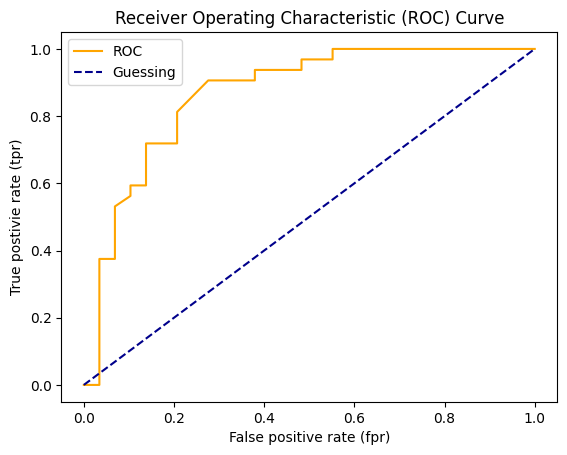

In [ ]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
  """
  Plots a ROC curve given the false positive rate (fpr)
  and true positive rate (tpr) of a model.
  """
  # Plot roc curve
  plt.plot(fpr, tpr, color="orange", label="ROC")
  # Plot line with no predictive power (baseline)
  plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

  # Customize the plot
  plt.xlabel("False positive rate (fpr)")
  plt.ylabel("True postivie rate (tpr)")
  plt.title("Receiver Operating Characteristic (ROC) Curve")
  plt.legend()
  plt.show()

plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

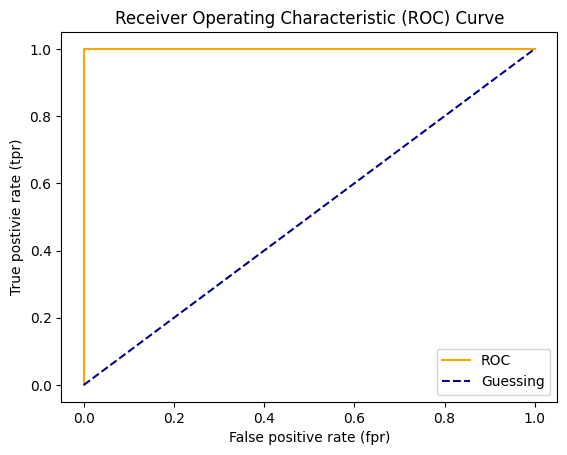

In [ ]:
# plot a perfect roc curve and auc score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [ ]:
tpr

array([0., 1., 1.])

In [ ]:
# Perfect AUC Score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

Is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [ ]:
# Documentation: https://scikit-learn.org/dev/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix

y_preds = model.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [ ]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [ ]:
23 + 6+6+26

61

In [ ]:
len(y_preds)

61

### Creating a confusion matrix using scikit-learn


In [ ]:
import sklearn
sklearn.__version__

'1.5.2'

In [ ]:
model

RandomForestClassifier()

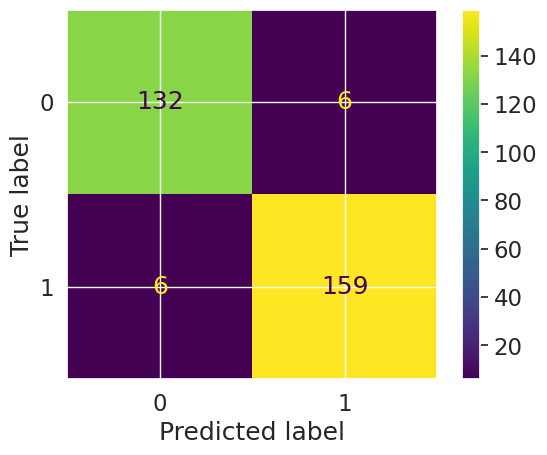

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, x, y)

plt.show()

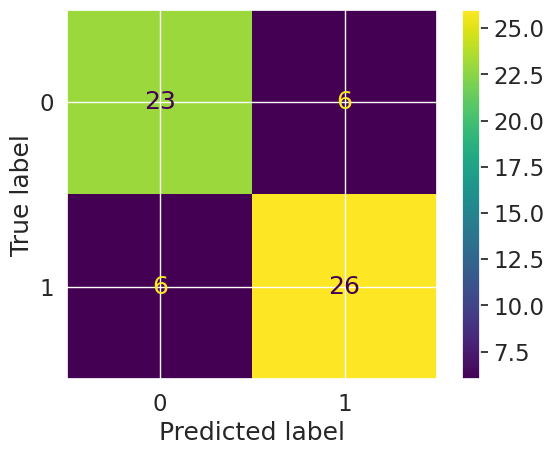

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

plt.show()

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
# Imbalanced labels, pay attentio to macro avg metric
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[1] = 1# Only one positive case

disease_preds = np.zeros(10000)# model predicts every case as 0
pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 5.2 Regression model evaluation metrics

Model evaluation metrics Documentation - https://scikit-learn.org/1.5/modules/model_evaluation.html

The ones we're going to vover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**
What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_preds = model.predict(x_test)

KeyboardInterrupt: 

In [ ]:
model.score(x_test, y_test)

0.8057322392488782

In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: MedHouseVal, Length: 4128, dtype: float64

In [ ]:
y_test.mean()

2.0550030959302323

**R2 method**

In [ ]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [ ]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [ ]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [ ]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

**Mean ansolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [ ]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted_values": y_preds})
df["differences"] = df["predicted_values"] - df["actual values"]
df.head(10)

,actual values,predicted_values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [ ]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.3265721842781009

**Mean squared error (MSE)**

MSE is the mean of square of the errors between actual and predicted values

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [ ]:
df["squared_differences"] = np.square(df['differences'])
df.head()

,actual values,predicted_values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [ ]:
# calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534073069137548

In [ ]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

<ipython-input-11-5784f50ac75c>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16


In [ ]:
df_large_error.head()

,actual values,predicted_values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [ ]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.25728320720794084

In [ ]:
df_large_error.iloc[1:1000] = 20
df_large_error

,actual values,predicted_values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [ ]:
df_large_error["squared_differences"].mean()

5.0422137329322965

**Mean squared logarithmic error (MSLE)**

In [ ]:
# Mean squared error
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test,y_preds)

0.02252644249593861

**Mean absolute percentage error (MAPE)**

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_preds)

0.18844421008702827

**Median absolute error (MedAE)**

In [ ]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, y_preds)

0.1987049999999997

**Max error**

In [ ]:
from sklearn.metrics import max_error
max_error(y_test, y_preds)

3.0942099999999995

**Example in calculating root mean squared error in python**

In [ ]:
import numpy as np
d = [0.000, 0.166, 0.333]   #ideal target distances, these can be all zeros.
p = [0.000, 0.254, 0.998]   #your performance goes here

print("d is: " + str(["%.8f" % elem for elem in d]))
print("p is: " + str(["%.8f" % elem for elem in p]))

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(np.array(d), np.array(p))
print("rms error is: " + str(rmse_val))

d is: ['0.00000000', '0.16600000', '0.33300000']
p is: ['0.00000000', '0.25400000', '0.99800000']
rms error is: 0.3872849941150143


**Glyph Legend: n is a whole positive integer representing the number of throws. i represents a whole positive integer counter that enumerates sum. d stands for the ideal distances, the list2 containing all zeros in above example. p stands for performance, the list1 in the above example. superscript 2 stands for numeric squared. di is the i'th index of d. pi is the i'th index of p.**

### 4.2.3 Finally using the scorer parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [ ]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None) # if scoring=None, estimator's default scoring evaluation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [ ]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [ ]:
# Precision
np.random.seed(42)

cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [ ]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [ ]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y , cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [ ]:
# Cross-validated recall
print(f"The cross-validated precision is: {np.mean(cv_recall)}")

The cross-validated precision is: 0.8545454545454545


In [ ]:
# f1
np.random.seed(42)
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_f1

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [ ]:
# Cross-validated f1
print(f"The cross-validated precision is: {np.mean(cv_f1)}")

The cross-validated precision is: 0.8426854603423344


Let's see the `scoring` parameter being using for a regression problem...

### Challenge

In [ ]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
# Explained variance
np.random.seed(42)
cv_explained_variance = cross_val_score(model, x, y, cv=5, scoring="explained_variance")
cv_explained_variance

array([0.69515798, 0.70275587, 0.74338221, 0.619716  , 0.71695251])

In [ ]:
# Cross-validated explained variance
print(f"The cross-validated precision is: {np.mean(cv_explained_variance)}")

The cross-validated precision is: 0.6955929135255033


In [ ]:
# Max_error
np.random.seed(42)
cv_neg_mean_absolute_error = cross_val_score(model, x, y, cv=5, scoring="neg_mean_absolute_error")
cv_neg_mean_absolute_error

array([-0.54256131, -0.40897184, -0.43731939, -0.46848644, -0.47310232])

In [ ]:
# Cross-validated explained variance
print(f"The cross-validated precision is: {np.mean(cv_neg_mean_absolute_error)}")

The cross-validated precision is: -0.4660882601695738


In [ ]:
# r2
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=5, scoring="r2")
cv_r2

array([0.51658668, 0.70265823, 0.74205574, 0.61777283, 0.68231648])

In [ ]:
# cross-validated r2
print(f"The cross-validated precision is: {np.mean(cv_r2)}")

The cross-validated precision is: 0.652277991538419


### Course

In [ ]:
from sklearn.model_selection import  cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

model = RandomForestRegressor()

In [ ]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6547159503729977

In [ ]:
cv_r2

array([0.62173503, 0.72091809, 0.62149473])

In [ ]:
# Mean absolute error
cv_mae = cross_val_score(model, x, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4821025375387598

In [ ]:
cv_mae

array([-0.51741378, -0.42209113, -0.50680271])

In [ ]:
# Mean squared error
cv_mse = cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.46484201443243117

In [ ]:
cv_mse

array([-0.51844165, -0.33195379, -0.54413061])

## 4.3 Using different evaluation metrics as scikit-learn functions

The 3rd way to evaluate scikit-learn machine learning models is to use the `sklearn.metrics` module - https://scikit-learn.org/1.5/api/sklearn.metrics.html#module-sklearn.metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & Y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create the model
model = RandomForestClassifier()

# Fit the model
model.fit(x_train, y_train)

# Make predictions
y_preds = model.predict(x_test)

# Evaluate model using evaluation functions
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

print(f"The accuracy is: {accuracy * 100:.2f}%")
print(f"The precision is: {precision * 100:.2f}%")
print(f"The recall is: {recall * 100:.2f}%")
print(f"The f1 score is: {f1 * 100:.2f}%")

The accuracy is: 85.25%
The precision is: 84.85%
The recall is: 87.50%
The f1 score is: 86.15%


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & Y
x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create the model
model = RandomForestRegressor()

# Fit the model
model.fit(x_train, y_train)

# Make predictions
y_preds = model.predict(x_test)

# Evaluate model using evaluation functions
r2_score = r2_score(y_test, y_preds)
mean_absolute_error = mean_absolute_error(y_test, y_preds)
mean_squared_error = mean_squared_error(y_test, y_preds)

print(f"The r2 score is: {r2_score * 100:.2f}%")
print(f"The mean absolute error is: {mean_absolute_error * 100:.2f}%")
print(f"The mean squared error is: {mean_squared_error * 100:.2f}%")

The r2 score is: 80.67%
The mean absolute error is: 32.64%
The mean squared error is: 25.33%


## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From model perspective:
* Is there a better model I can use?
* Could we improve de current model?

Hyperparameters vs. Parameters
* Parameters = model find these parameters in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomnly with RandomSearchCV
3. Exhaustively with GridSearchCV


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


clf = RandomForestClassifier()

### 5.1 Turning hyperparameters by hand

Let's make 3 sets, trining validation and test.

In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [ ]:
def evaluate_preds(y_true, y_preds):
  """
  Performs evaluation comparision on y_true labels vs. y_pred labels.
  """

  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  metric_dict = {"accuracy": round(accuracy, 2),
                 "precision": round(precision, 2),
                 "recall": round(recall, 2),
                 "f1": round(f1, 2)}
  print(f"Acc: {accuracy * 100:.2f}%")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1 score: {f1:.2f}")

  return metric_dict

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & Y

x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make baseline predictions
y_preds = clf.predict(x_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

Acc: 78.69%
Precision: 0.81
Recall: 0.79
F1 score: 0.80


{'accuracy': 0.79, 'precision': 0.81, 'recall': 0.79, 'f1': 0.8}

In [ ]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=150)
clf_2.fit(x_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

NameError: name 'x_valid' is not defined

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Instantiate RandomizedSearchCV
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter = 10, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42,
                            refit=True)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [ ]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [ ]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 80.33%
Precision: 0.84
Recall: 0.79
F1 score: 0.81


### 5.3 HyperpRmeter tuning with GridSearchCV

In [ ]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

np.random.seed(42)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2,
                      refit=True)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [ ]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
gs_y_preds = gs_clf.predict(x_test)

# evaluate predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 80.33%
Precision: 0.84
Recall: 0.79
F1 score: 0.81


Let's compare our different models metrics.

<Axes: >

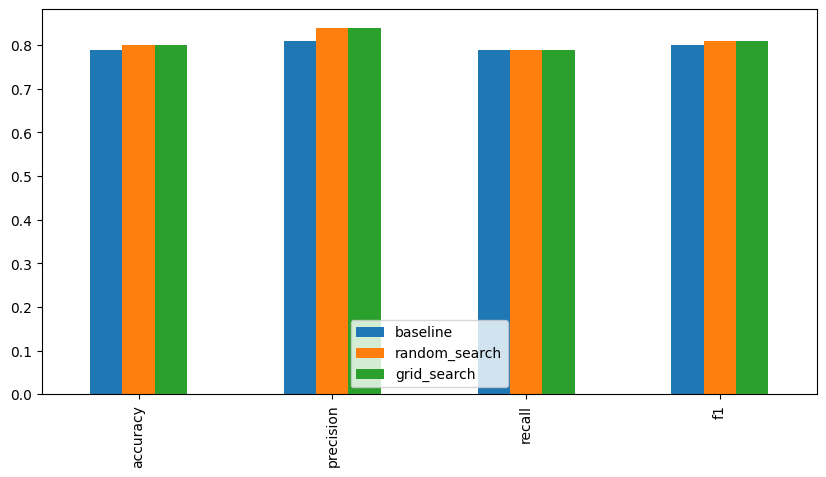

In [ ]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                   "random_search": rs_metrics,
                   "grid_search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,5))

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With python's `pickle` module
2. With the `joblib` module

**Pickle**

In [ ]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [ ]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [ ]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)

# Evaluate the predictions
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 0.84
Recall: 0.82
F1 score: 0.83


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.82, 'f1': 0.83}

**Joblib**

In [ ]:
from joblib import dump, load

# Save a model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [ ]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [ ]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 80.33%
Precision: 0.84
Recall: 0.79
F1 score: 0.81


{'accuracy': 0.8, 'precision': 0.84, 'recall': 0.79, 'f1': 0.81}

## 7. Putting it all together

In [ ]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
data.dtypes

,0
Make,object
Colour,object
Odometer (KM),float64
Doors,float64
Price,float64


In [ ]:
data.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [3]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
x = data.drop("Price", axis=1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

It's also possible tu use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.

In [6]:
# Use GridSearchCV with our regressio Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [7]:
gs_model.score(x_test, y_test)

0.2848784564026805